In [1]:
import pymssql
import pandas as pd
import numpy as np
import os
import re
import joblib
import sys 
import DSI_Capstone_Steemit
# from DSI_Capstone_Steemit.utils.utils import(
#     load_data_and_description,
#     load_raw
# )

# load_data_and_description(data_type = 'tfidf')
data_directory = '../data/'
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
authors = pd.read_csv(os.path.join(data_directory,'accounts.csv'))

In [3]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
reputation_scaled = transformer.fit_transform(authors['reputation'])[0]
reputation_scaled = reputation_scaled - min(reputation_scaled) + 0.5

authors['reputation scaled'] = reputation_scaled

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


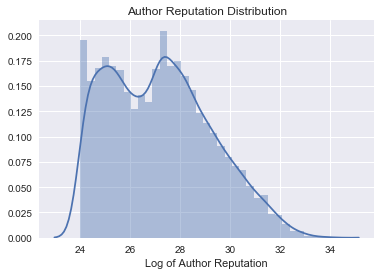

In [4]:
sns.distplot(np.log(authors['reputation']))
plt.xlabel('Log of Author Reputation')
plt.title('Author Reputation Distribution')

In [5]:
def load_raw_cleaned():
    posts_path = os.path.join(data_directory, 'posts_raw_cleaned',
                              'posts_raw_cleaned.csv')
    df_posts = pd.read_csv(posts_path)
    return df_posts

raw = load_raw_cleaned()

In [6]:
# raw = raw.set_index('created')

In [7]:
# raw.index = pd.to_datetime(raw.index)

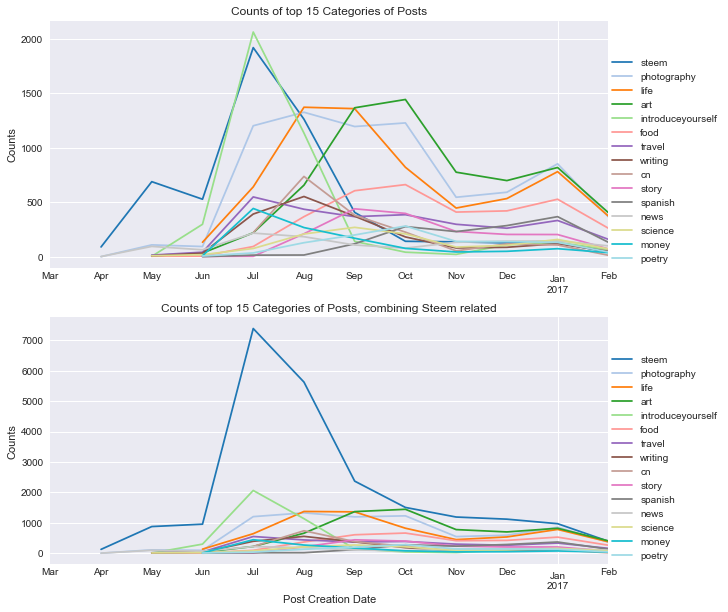

In [8]:
raw2 = raw.ix[:,['category','created']]
raw2.loc[:,'count'] = 1
raw2.index = pd.to_datetime(raw2['created'])
grouped = raw2.groupby([pd.TimeGrouper("M"),'category']).count()
grouped2 = grouped.reset_index('category')
grouped3 = grouped2.pivot(columns='category', values='count')
idx  = grouped3.sum(axis = 0) > 300
grouped4 = grouped3.ix[:,idx]
column_order = grouped4.sum(axis = 0).sort_values(ascending = False).index

raw2 = raw.ix[:,['category','created']]
idx = raw2['category'].str.contains(r'^steem').fillna(False)
raw2.ix[idx,'category'] = 'steem'
raw2.loc[:,'count'] = 1
raw2.index = pd.to_datetime(raw2['created'])
grouped = raw2.groupby([pd.TimeGrouper("M"),'category']).count()
grouped2 = grouped.reset_index('category')
grouped3 = grouped2.pivot(columns='category', values='count')
idx  = grouped3.sum(axis = 0) > 300
grouped_combined_terms = grouped3.ix[:,idx]
column_order = grouped_combined_terms.sum(axis = 0).sort_values(ascending = False).index


fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
top = 15
grouped4.ix[:,column_order[0:top]].plot(colormap='Vega20', ax = ax1)
ax1.legend(loc = (1,0))
ax1.set_title('Counts of top 15 Categories of Posts')
ax1.set_ylabel('Counts')
ax1.set_xlabel('')



top = 15
grouped_combined_terms.ix[:,column_order[0:top]].plot(colormap='Vega20', ax = ax2)
ax2.legend(loc = (1,0))
ax2.set_title('Counts of top 15 Categories of Posts, combining Steem related')
ax2.set_ylabel('Counts')

ax2.set_xlabel('Post Creation Date')

# fig.tight_layout()



In [9]:
idx_cols = raw.columns.str.contains('number')

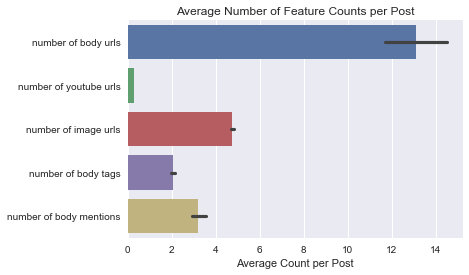

In [10]:
sns.barplot(y = 'variable',x = 'value',data = pd.melt(raw.ix[:,idx_cols]))
plt.xlabel('Average Count per Post')
plt.title('Average Number of Feature Counts per Post')
plt.ylabel('')

In [11]:
post_lengths = raw['body'].fillna('').str.split(' ').apply(len)
# post_lengths = post_lengths[post_lengths > 10]

In [12]:
raw = raw[(raw['depth'] == 0)]

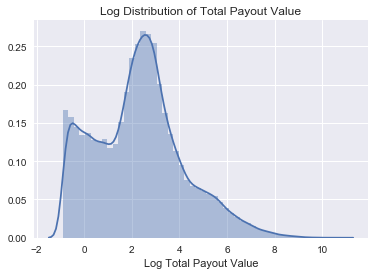

In [13]:
sns.distplot(np.log(raw['total_payout_value']),label = 'Top Author Reputations')
plt.xlabel('Log Total Payout Value')
plt.title('Log Distribution of Total Payout Value')


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


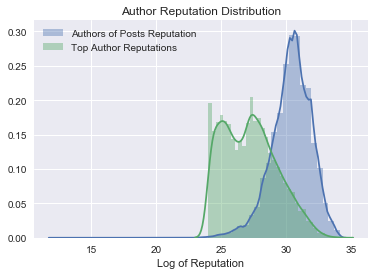

In [14]:
sns.distplot(np.log(raw.ix[raw['author'].duplicated(),'author_reputation']).dropna(), label = 'Authors of Posts Reputation')

sns.distplot(np.log(authors['reputation']),label = 'Top Author Reputations')
plt.xlabel('Log of Reputation')
plt.title('Author Reputation Distribution')

plt.legend(loc = 'best')


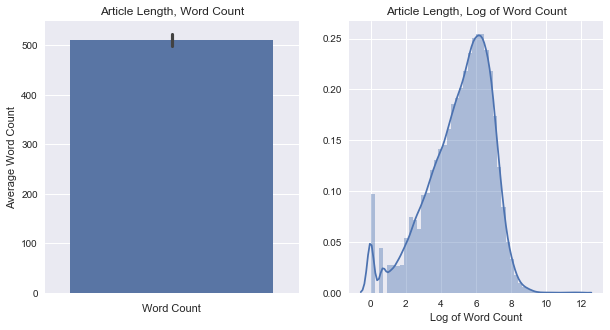

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
sns.barplot((post_lengths), ax = ax1, orient='v')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Average Word Count')


ax1.set_title('Article Length, Word Count')

sns.distplot(np.log(post_lengths), ax = ax2)
ax2.set_title('Article Length, Log of Word Count')
ax2.set_xlabel('Log of Word Count')

# plt.ylim(0,0.000003)